In [1]:
import numpy as np
import matplotlib.pyplot as plt
from stochastic.processes import FractionalBrownianMotion
from utils import *

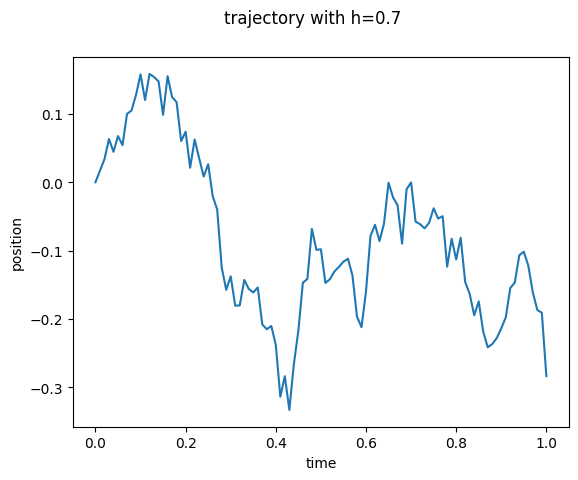

In [2]:
#Quick sanity to check to show a sample relization

f = FractionalBrownianMotion(hurst=0.7, t=1)
# Generate a fBm realization
fbm_sample = f.sample(100)
# Get the times associated with the fBm
t_values = f.times(100)
plt.plot(t_values[:10000], fbm_sample[:10000])
plt.xlabel('time')
plt.ylabel('position')
plt.suptitle("trajectory with h=0.7")
plt.show()

# Train

In [2]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [6]:
N_SIMS=60000  #Number of simulations
trajectory_length=102   #Number of samples per simulation
batch_size=10
learning_rate=1e-3


X_train, Y_train, X_test, Y_test = generate_dataset(N_SIMS, trajectory_length)

train_data=SimulationDatset(X_train, Y_train)
train_loader=DataLoader(train_data, batch_size=batch_size)

test_data=SimulationDatset(X_test, Y_test)
test_loader=DataLoader(test_data, batch_size=batch_size)


model=DeepBrownianEncoder(embedding_dim=8, num_layers=3, num_heads=2).to(device)
loss_fn=nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

Simulations Generated: 0
Simulations Generated: 10000
Simulations Generated: 20000
Simulations Generated: 30000
Simulations Generated: 40000
Simulations Generated: 50000


In [7]:
epochs = 6
losses=[]
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    loss = train(train_loader, model, loss_fn, optimizer, device)
    losses += (loss)
    DatasetMAE(test_loader, model, device)
print("Done!")

Epoch 1
-------------------------------
loss: 0.149933  [   10/42000]
loss: 0.069083  [ 1010/42000]
loss: 0.174128  [ 2010/42000]
loss: 0.083758  [ 3010/42000]
loss: 0.113245  [ 4010/42000]
loss: 0.081898  [ 5010/42000]
loss: 0.041545  [ 6010/42000]
loss: 0.040011  [ 7010/42000]
loss: 0.112530  [ 8010/42000]
loss: 0.058842  [ 9010/42000]
loss: 0.055015  [10010/42000]
loss: 0.078740  [11010/42000]
loss: 0.033610  [12010/42000]
loss: 0.046557  [13010/42000]
loss: 0.017812  [14010/42000]
loss: 0.066259  [15010/42000]
loss: 0.078423  [16010/42000]
loss: 0.066096  [17010/42000]
loss: 0.039042  [18010/42000]
loss: 0.059465  [19010/42000]
loss: 0.057236  [20010/42000]
loss: 0.061025  [21010/42000]
loss: 0.062444  [22010/42000]
loss: 0.051103  [23010/42000]
loss: 0.091836  [24010/42000]
loss: 0.032343  [25010/42000]
loss: 0.060616  [26010/42000]
loss: 0.036893  [27010/42000]
loss: 0.046996  [28010/42000]
loss: 0.032938  [29010/42000]
loss: 0.027226  [30010/42000]
loss: 0.039223  [31010/42000]


[]

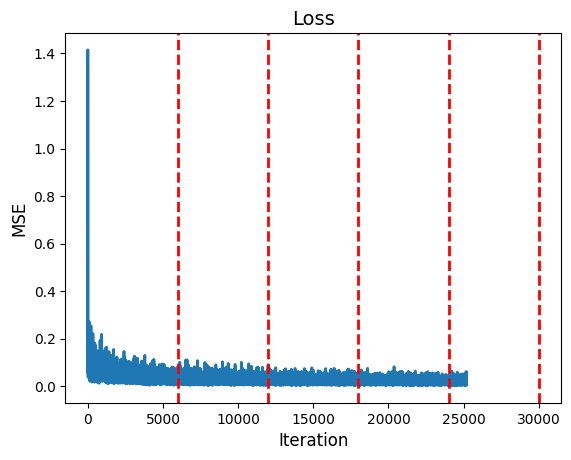

In [8]:
plt.plot(losses, linewidth=2)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.title('Loss', fontsize=14)
for e in range(1, epochs):
    plt.axvline(x=e*(N_SIMS/batch_size), color='red', linewidth=2, label='epoch', linestyle='--')
#plt.legend(fontsize=12)
plt.plot()

In [ ]:
#Save model
torch.save(model.state_dict(), 'model/model_weights.pth')

In [52]:
#Load the model
